In [7]:

#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#df = pd.read_excel('C:\\Users\\12035\\Downloads\\Exp046_Fitted_Data.xlsx')

In [9]:
#df.columns

In [3]:
#df['2theta_100']

In [35]:
#def volumeCalc(alpha, 
import pandas as pd

file_path = r"C:\Users\12035\Downloads\Exp046_Fitted_Data.xlsx"
df = pd.read_excel(file_path)

print("Column names:", df.columns.tolist())



Column names in your file: ['FileName', 'Time', 'Intensity_100', 'N1_Error', 'two_Theta_100', 'x1_Error', 'FWHM_100', 'f1_Error', 'w1', 'w1_Error', 'Intensity_002', 'N2_Error', '2theta_002', 'x2_Error', 'FWHM_002', 'f2_Error', 'w2', 'w2_Error', 'Intensity_110', 'N3_Error', '2theta_110', 'x3_Error', 'FWHM_110', 'f3_Error', 'w3', 'w3_Error', 'Intensity_101', 'N4_Error', '2theta_101', 'x4_Error', 'FWHM_101', 'f4_Error', 'w4', 'w4_Error']


Time: ['FileName', 'Time', 'Intensity_100', 'N1_Error', 'two_Theta_100', 'x1_Error', 'FWHM_100', 'f1_Error', 'w1', 'w1_Error', 'Intensity_002', 'N2_Error', '2theta_002', 'x2_Error', 'FWHM_002', 'f2_Error', 'w2', 'w2_Error', 'Intensity_110', 'N3_Error', '2theta_110', 'x3_Error', 'FWHM_110', 'f3_Error', 'w3', 'w3_Error', 'Intensity_101', 'N4_Error', '2theta_101', 'x4_Error', 'FWHM_101', 'f4_Error', 'w4', 'w4_Error']


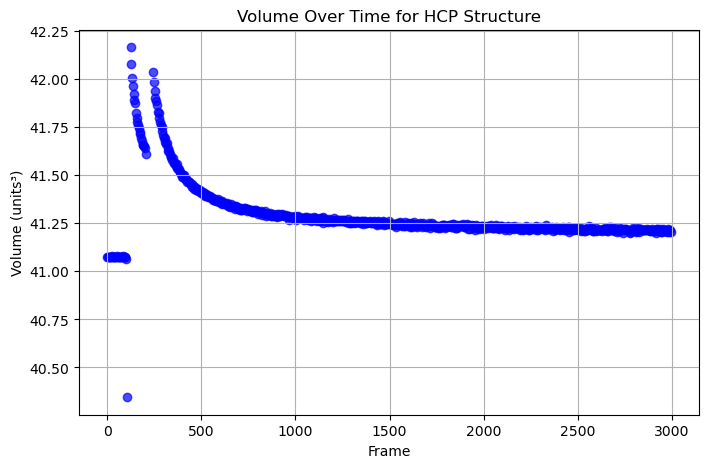

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\12035\Downloads\Exp046_Fitted_Data.xlsx"
df = pd.read_excel(file_path)

print("Time:", df.columns.tolist())  

Columns = ['Time', 'Intensity_100', 'two_Theta_100', 'FWHM_100'] #create list of columns 
df = df[Columns] 


def calculate_hcp_lattice_parameters(Intensity_100, two_heta_100, FWHM_100, wavelength=0.20211, miller_indices=(1, 0, 0)):
    theta = np.radians(two_theta / 2) #angle conversion 
    d_spacing = wavelength / (2 * np.sin(theta)) #calculate d-spacing

    (h, k, l) = miller_indices #defined miller indices = hkl 
    a = d_spacing * np.sqrt((4/3) * (h**2 + h*k + k**2))  
    c = a * 0.633  #find 0.633

    return a, c 

data = [] #create list 


for row in df.itertuples(index=False): # iterate over each row 
    time, intensity, two_theta, fwhm = row # extract values from row 
    a, c = calculate_hcp_lattice_parameters(intensity, two_theta, fwhm) # calculate lattice parameter for hcp
    volume = (3 * np.sqrt(3) / 2) * a**2 * c  # volume equation
    data.append({'Time': time, 'lattice_parameter_a': a, 'lattice_parameter_c': c, 'volume': volume}) # append data into list 

# Convert to DataFrame
df_result = pd.DataFrame(data)

# plot volume over time in ms 
plt.figure(figsize=(8, 5))
plt.scatter(df_result['Time'], df_result['volume'], marker='o', color='b', alpha=0.7)
plt.xlabel('Frame')
plt.ylabel('Volume (units³)')
plt.title('Volume Over Time for HCP Structure')
plt.grid(True)
plt.show()
